In [48]:
import pandas as pd 
import numpy 
import string
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import wordcloud
%matplotlib inline

In [49]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-11-01 11:03:37.273889: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-01 11:03:37.274058: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-01 11:03:40.961830: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-11-01 11:03:40.962022: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-01 11:03:40.964689: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Dell-world
2022-11-01 11:03:40.964756: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Dell-world


In [50]:
!pip install -U spacy

In [51]:
!pip install wordcloud

In [52]:
import pandas as pd 
train_tweet = pd.read_csv("train.csv",encoding = 'latin1', error_bad_lines = False)
train_tweet

C:\Users\Srinu\AppData\Local\Temp\ipykernel_23320\3843958410.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_tweet = pd.read_csv("train.csv",encoding = 'latin1', error_bad_lines = False)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [53]:
train_tweet.drop(['id','keyword','location','target'],axis=1)

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,Police investigating after an e-bike collided ...


In [54]:
#remove both the leading and the trailing characters
train_tweet = [text.strip() for text in train_tweet.text]
# removes empty strings, because they are considered in Python as False
train_tweet=[text for text in train_tweet if text] 

train_tweet[0:10]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area..."]

In [55]:
#joining the text into one string/text
Text=' '.join(train_tweet)
Text

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida #

In [56]:
#punctation
no_punc_text = Text.translate(str.maketrans(' ',' ', string.punctuation))
no_punc_text

'Our Deeds are the Reason of this earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask Canada All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected 13000 people receive wildfires evacuation orders in California Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school RockyFire Update  California Hwy 20 closed in both directions due to Lake County fire  CAfire wildfires flood disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas Im on top of the hill and I can see a fire in the woods Theres an emergency evacuation happening now in the building across the street Im afraid that the tornado is coming to our area Three people died from the heat wave so far Haha South Tampa is getting flooded hah WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK flooding raining flooding Florida TampaBay Tampa 18 or 19 days Ive l

In [57]:
#tokenization
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srinu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all', 'Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada', 'All', 'residents', 'asked', 'to', 'shelter', 'in', 'place', 'are', 'being', 'notified', 'by', 'officers', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected', '13000', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'in', 'California']


In [58]:
len(text_tokens)

111564

In [59]:
#Remove Stopword
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkit')

my_stop_words=stopwords.words('english')
stopwords=pd.read_csv("stop.txt")

my_stop_words.extend(stopwords)
no_Stop_token=[word for word in text_tokens if not word in my_stop_words]
print(no_Stop_token[0:40])



['Our', 'Deeds', 'Reason', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada', 'All', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'No', 'evacuation', 'shelter', 'place', 'orders', 'expected', '13000', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'California', 'Just', 'got', 'sent', 'photo', 'Ruby']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srinu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punkit: Package 'punkit' not found in index


In [60]:
#Noramalize the data
lower_words = [Text.lower() for Text in no_Stop_token]
print(lower_words[0:25])

['our', 'deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'all', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'no', 'evacuation', 'shelter']


In [61]:
#steaming
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40]) 
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['our', 'deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us', 'forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada', 'all', 'resid', 'ask', 'shelter', 'place', 'notifi', 'offic', 'no', 'evacu', 'shelter', 'place', 'order', 'expect', '13000', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california', 'just', 'got', 'sent', 'photo', 'rubi']
['our', 'deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us', 'forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada', 'all', 'resid', 'ask', 'shelter', 'place', 'notifi', 'offic', 'no', 'evacu', 'shelter', 'place', 'order', 'expect', '13000', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california', 'just', 'got', 'sent', 'photo', 'rubi']


In [62]:
#NLP english language model of spacy library
nlp=spacy.load('en_core_web_sm')
nlp

In [63]:
# lemmas being one of them, but mostly POS, which will follow later
doc=nlp(' '.join(no_Stop_token))
print(doc[0:40])

Our Deeds Reason earthquake May ALLAH Forgive us Forest fire near La Ronge Sask Canada All residents asked shelter place notified officers No evacuation shelter place orders expected 13000 people receive wildfires evacuation orders California Just got sent photo Ruby


In [64]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['our', 'Deeds', 'Reason', 'earthquake', 'may', 'ALLAH', 'forgive', 'we', 'Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada', 'all', 'resident', 'ask', 'shelter', 'place', 'notify', 'officer', 'no', 'evacuation', 'shelter']


# Feature Extraction

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [66]:
print(vectorizer.vocabulary_)

{'our': 15353, 'deeds': 4180, 'reason': 16575, 'earthquake': 4882, 'may': 13879, 'allah': 1088, 'forgive': 5885, 'we': 20387, 'forest': 5878, 'fire': 5702, 'near': 14683, 'la': 13015, 'ronge': 17065, 'sask': 17336, 'canada': 2783, 'all': 1087, 'resident': 16804, 'ask': 1519, 'shelter': 17696, 'place': 15843, 'notify': 14954, 'officer': 15115, 'no': 14864, 'evacuation': 5283, 'order': 15303, 'expect': 5365, '13000': 132, 'people': 15655, 'receive': 16594, 'wildfire': 20558, 'california': 2740, 'just': 12673, 'got': 6409, 'send': 17553, 'photo': 15752, 'ruby': 17151, 'alaska': 1036, 'smoke': 18015, 'pour': 16019, 'school': 17413, 'rockyfire': 17020, 'update': 19913, 'hwy': 11830, '20': 245, 'close': 3303, 'direction': 4452, 'due': 4804, 'lake': 13036, 'county': 3707, 'cafire': 2711, 'flood': 5789, 'disaster': 4472, 'heavy': 6837, 'rain': 16453, 'cause': 2936, 'flash': 5758, 'flooding': 5790, 'street': 18514, 'manitou': 13728, 'colorado': 3429, 'springs': 18296, 'area': 1404, 'top': 19404

In [67]:
print(vectorizer.get_feature_names()[50:100])
print(x.toarray()[50:100])

['0day', '0npzp', '10', '100', '1000', '10000', '100000', '1000amp1000', '1008planetâ', '1008plaâ', '100bn', '100nd', '100s', '101', '1015', '1015pm', '1028', '103', '1030', '1030pm', '103424', '1038pm', '1040', '10401', '1040pm', '105', '106', '1061', '1061thetwister', '10638', '107', '1079', '109', '10k', '10monthold', '10news', '10th', '10w', '10x', '10â', '11', '1100', '11000', '11000000', '110358', '111020', '1115', '112', '113', '1130']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\anacoda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
print(x.toarray().shape)

(84009, 21045)


# Bigrams and Trigrams

In [69]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(train_tweet) 

In [70]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'after', 'all', 'amp', 'an', 'and', 'are', 'as', 'at', 'back', 'be', 'been', 'body', 'burning', 'but', 'by', 'california', 'can', 'co', 'crash', 'day', 'disaster', 'do', 'don', 'emergency', 'fire', 'for', 'from', 'get', 'got', 'has', 'have', 'he', 'her', 'his', 'how', 'http', 'http co', 'https', 'https co', 'if', 'in', 'in the', 'into', 'is', 'it', 'just', 'like', 'man', 'me', 'more', 'my', 'new', 'news', 'no', 'not', 'now', 'of', 'of the', 'off', 'on', 'on the', 'one', 'or', 'out', 'over', 'people', 'police', 're', 'so', 'some', 'still', 'storm', 'suicide', 'than', 'that', 'the', 'them', 'there', 'they', 'this', 'time', 'to', 'to the', 'up', 'us', 'via', 'video', 'was', 'we', 'were', 'what', 'when', 'who', 'why', 'will', 'with', 'would', 'you', 'your']
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TF-IDF VECTORIZER

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(train_tweet)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['05', '08', '10', '11', '15', '2015', '30', '40', '70', 'about', 'accident', 'after', 'again', 'against', 'air', 'all', 'also', 'always', 'am', 'ambulance', 'amp', 'an', 'and', 'and the', 'another', 'any', 'are', 'area', 'armageddon', 'army', 'around', 'as', 'ass', 'at', 'at the', 'atomic', 'attack', 'attacked', 'august', 'away', 'back', 'bad', 'bag', 'bags', 'bang', 'battle', 'be', 'because', 'been', 'before', 'being', 'best', 'better', 'big', 'black', 'blood', 'bloody', 'boat', 'body', 'bomb', 'bombed', 'bomber', 'bombing', 'boy', 'breaking', 'bridge', 'buildings', 'burned', 'burning', 'burning buildings', 'bus', 'but', 'by', 'by the', 'california', 'call', 'can', 'car', 'catastrophe', 'cause', 'change', 'charged', 'check', 'china', 'city', 'co', 'collapse', 'collapsed', 'collided', 'collision', 'come', 'coming', 'confirmed', 'content', 'could', 'county', 'crash', 'crashed', 'cross', 'cross body', 'crush', 'curfew', 'damage', 'danger', 'day', 'dead', 'death', 'deaths', 'debris', 'de

In [72]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

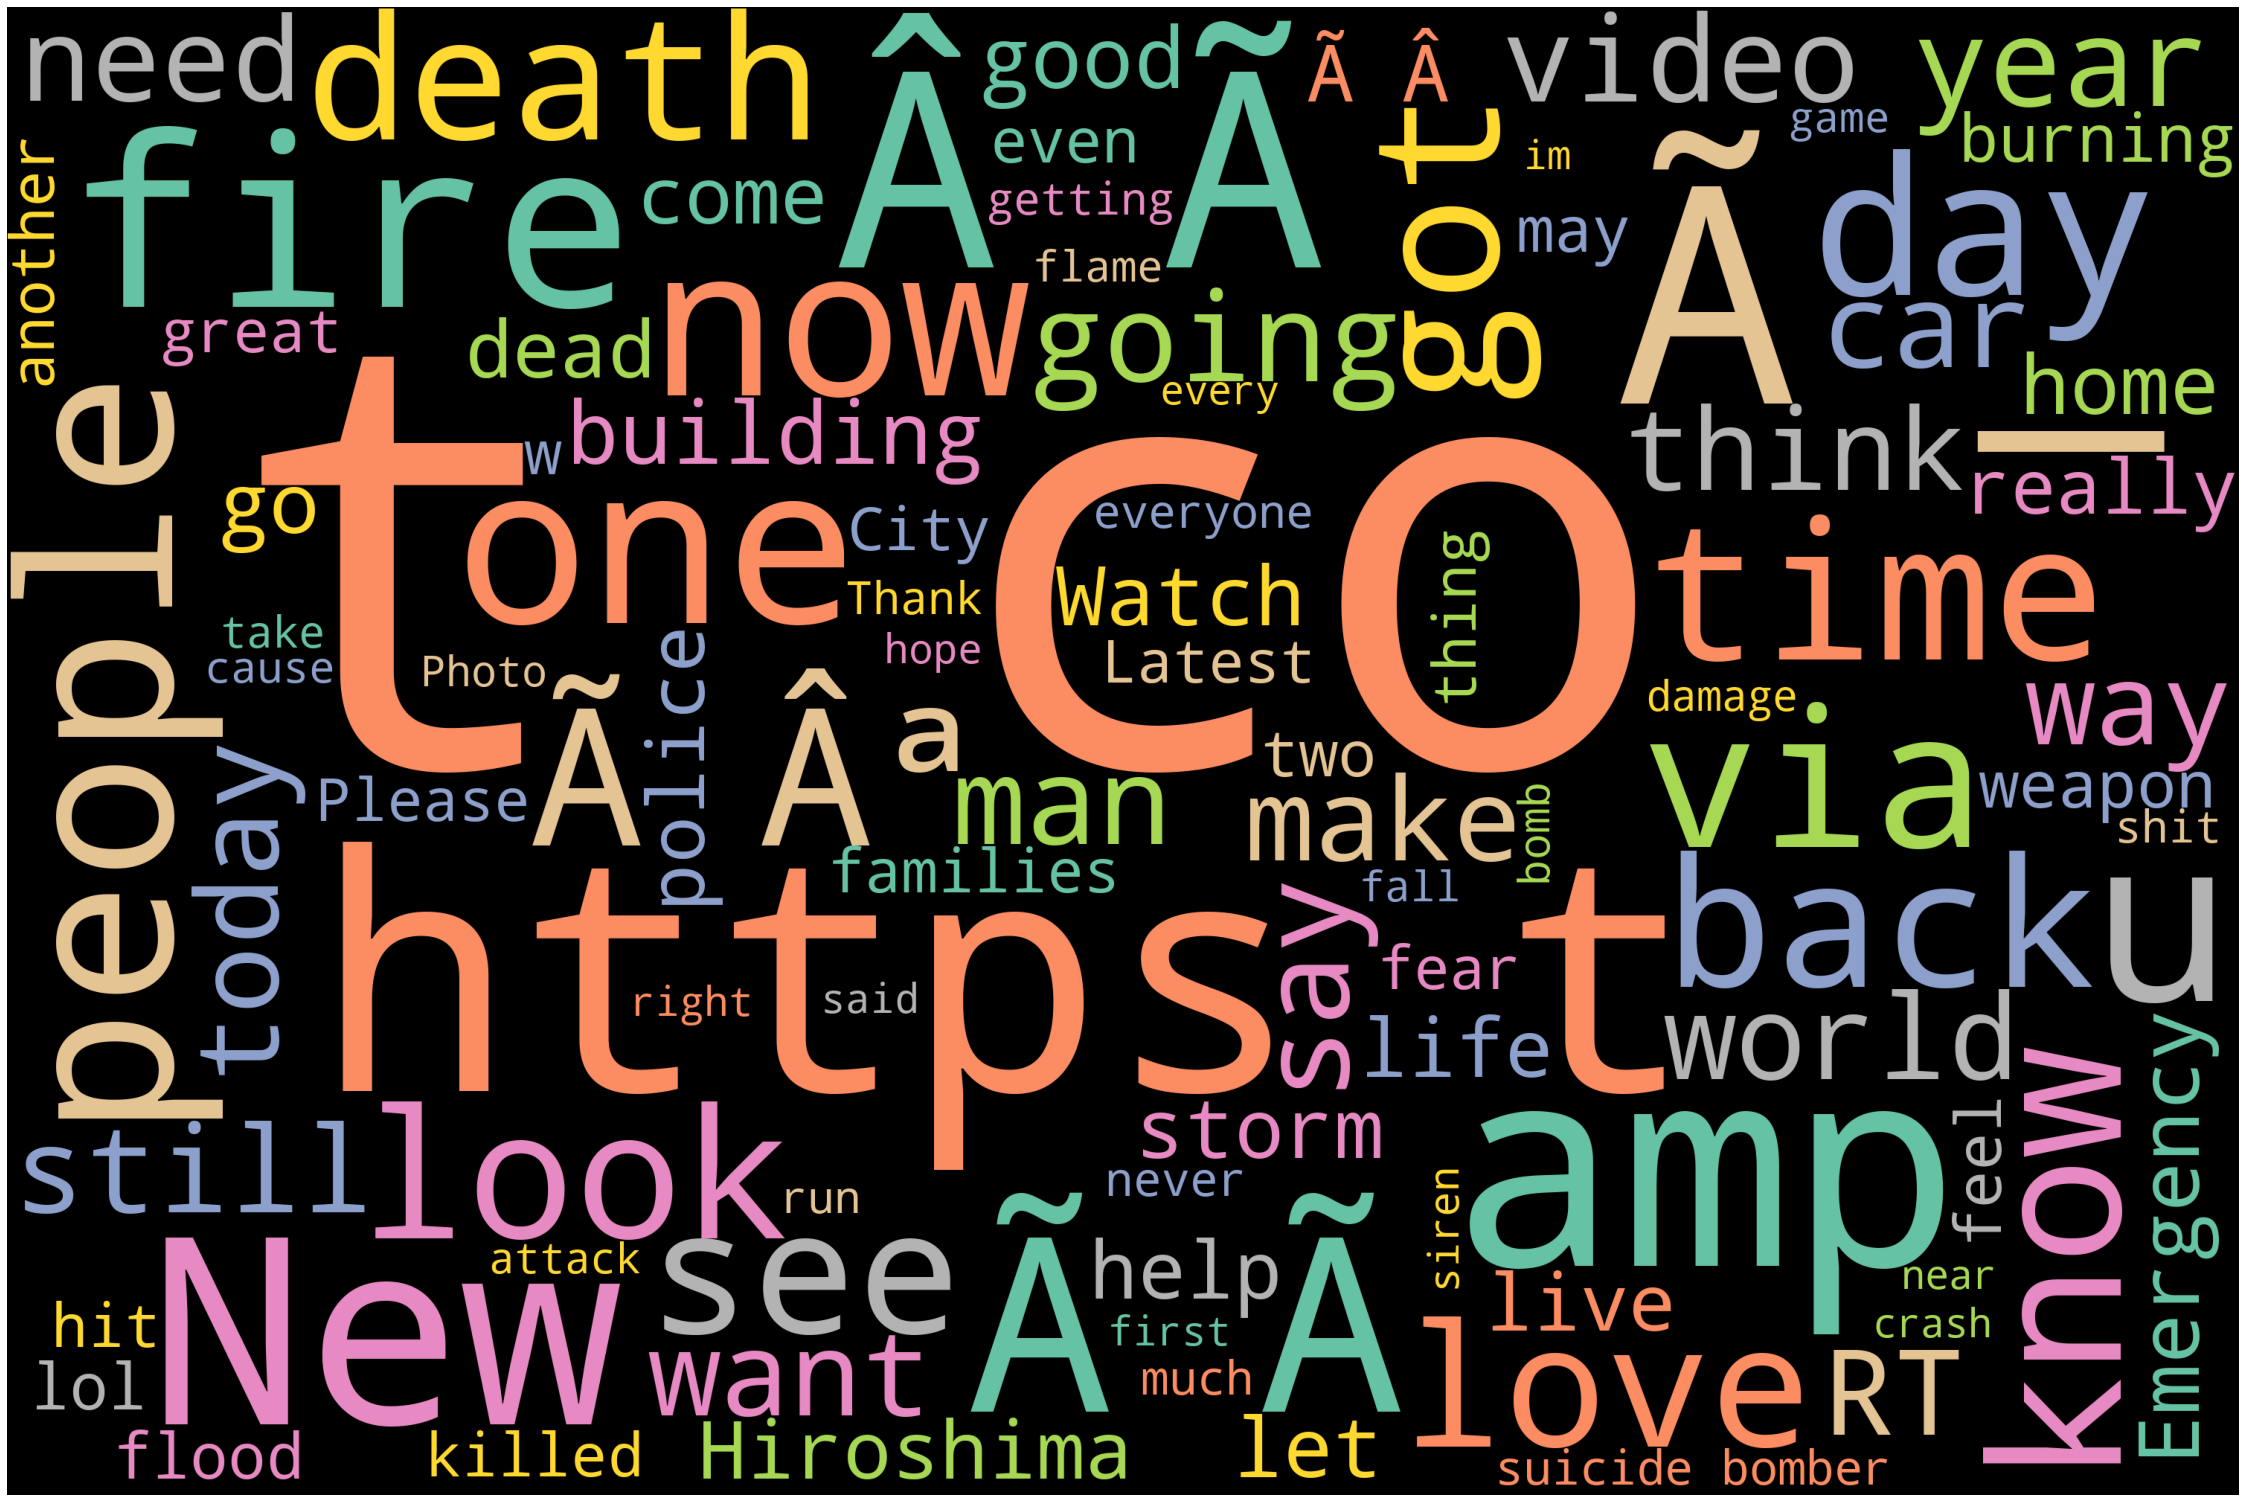

In [73]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(Text)
# Plot
plot_cloud(wordcloud)

# Emotion Mining

In [74]:
#Sentiment Analysis
afinn=pd.read_csv("Afinn.csv",sep=',',encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [75]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [76]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentence=tokenize.sent_tokenize(" ".join(train_tweet))
sentence[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srinu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["I've lost count #Flood in Bago Myanmar #We arrived Bago Damage to school bus on 80 in multi car crash #BREAKING What's up man?",
 'I love fruits Summer is lovely My car is so fast What a goooooooaaaaaal!!!!!!',
 'this is ridiculous.... London is cool ;) Love skiing What a wonderful day!',
 "LOOOOOOL No way...I can't eat that shit Was in NYC last week!",
 'Love my girlfriend Cooool :) Do you like pasta?',
 'The end!',
 '@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C We always try to bring the heavy.',
 '#metal #RT http://t.co/YAo1e0xngw #AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.',
 'http://t.co/2nndBGwyEi Crying out for more!',
 "Set me ablaze On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N @PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season."]

In [77]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,Our Deeds are the Reason of this #earthquake M...
1,Canada All residents asked to 'shelter in plac...
2,No other evacuation or shelter in place orders...
3,20 closed in both directions due to Lake Count...
4,There's an emergency evacuation happening now ...
...,...
5047,Very troubling.
5048,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.
5049,http://t.co/zDtoyd8EbJ Police investigating af...
5050,E-bike rider suffered serious non-life threate...


In [78]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [79]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [80]:
calculate_sentiment(text = 'amazing') 

4

In [81]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [82]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    19
1    13
2    39
3    42
4    67
5    24
6    14
7    13
8    12
9     9
Name: word_count, dtype: int64

In [83]:
sent_df

,sentence,sentiment_value,word_count
0,Our Deeds are the Reason of this #earthquake M...,-1,19
1,Canada All residents asked to 'shelter in plac...,0,13
2,No other evacuation or shelter in place orders...,-1,39
3,20 closed in both directions due to Lake Count...,-4,42
4,There's an emergency evacuation happening now ...,-7,67
...,...,...,...
5047,Very troubling.,0,2
5048,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,0,7
5049,http://t.co/zDtoyd8EbJ Police investigating af...,-1,13
5050,E-bike rider suffered serious non-life threate...,-6,7


In [84]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
4414,YOU CREATED THIS @GOP http://t.co/hFgjgFGfeL A...,9,30
3820,Long before the #PPact story broke I was invol...,10,43
4794,@ThatRussianMan you're too busy finishing thos...,10,43
2090,Electric vs Gas brewing (not wanting to electr...,10,79
2653,Cuban leader extends sympathy to Vietnam over ...,11,110
4407,@LawfulSurvivor T-Dog had been holed up in an ...,11,93
4050,: \n Sinkhole Selfies: You Wont Belie.....,12,32
2049,New Mad Max Screenshots Show Off a Lovely Dust...,14,78
2995,#BB17 HURRICANE GUILLERMO LIVE NOAA TRACKING /...,15,46
1682,#ChicagoScanner Consent Order on cleanup under...,21,203


In [85]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    5052.000000
mean       -1.249604
std         4.466205
min       -76.000000
25%        -2.000000
50%         0.000000
75%         0.000000
max        21.000000
Name: sentiment_value, dtype: float64

In [86]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,Our Deeds are the Reason of this #earthquake M...,-1,19
1,Canada All residents asked to 'shelter in plac...,0,13
2,No other evacuation or shelter in place orders...,-1,39
3,20 closed in both directions due to Lake Count...,-4,42
4,There's an emergency evacuation happening now ...,-7,67


In [87]:
sent_df['index']=range(0,len(sent_df)) 

C:\anacoda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

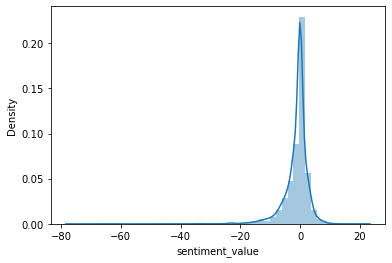

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

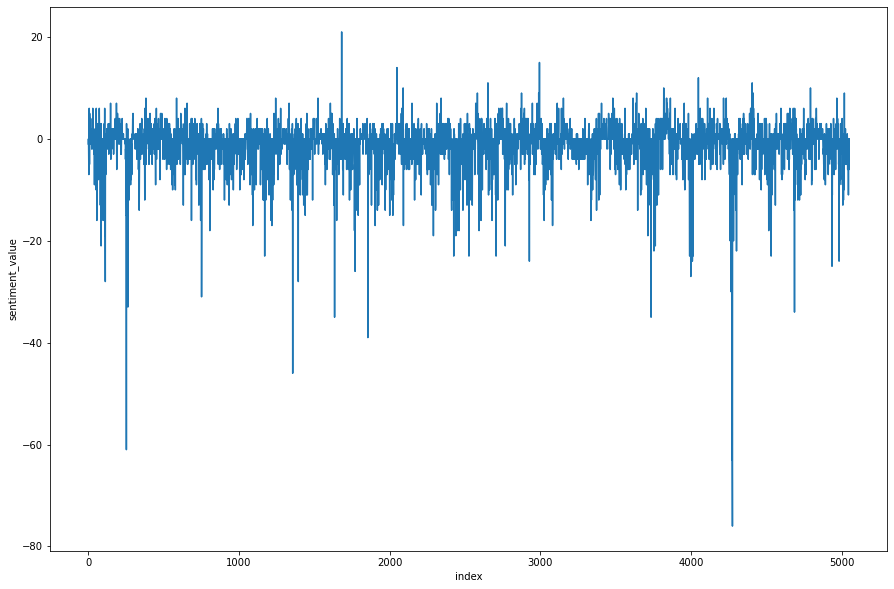

In [89]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

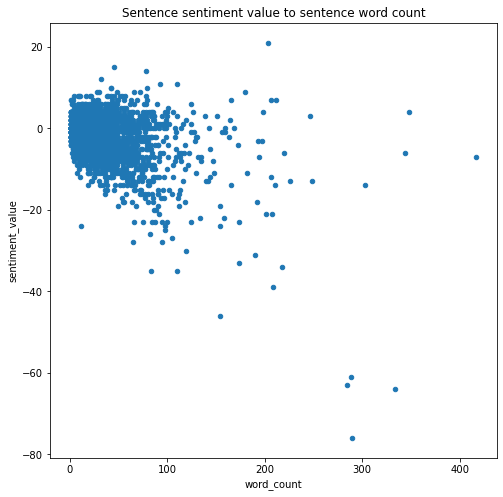

In [90]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')